In [3]:
pip install scikit-image

     |████████████████████████████████| 13.4 MB 7.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.4 MB 7.8 MB/s eta 0:00:01
     |████████████████████████████████| 216 kB 30.5 MB/s eta 0:00:01
     |████████████████████████████████| 6.9 MB 15.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn
from sklearn.cluster import KMeans
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import cv2
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (10, 10
                                 ) 
plt.rcParams['axes.grid']=False
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [5]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [8]:
image = get_image('IMG_0399.jpg')
number_of_colors = 10
modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
clf = KMeans(n_clusters = number_of_colors)
labels = clf.fit_predict(modified_image)

In [9]:
counts = Counter(labels)

center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

([<matplotlib.patches.Wedge at 0x7fe6721852e0>,
 [Text(-0.10330454653177557, 1.0951384253444238, '#fefefe'),
  Text(-1.0755767651689794, -0.23050948403186056, '#02030b'),
  Text(-0.9877348697998738, -0.48412790353523977, '#d49a8c'),
  Text(-0.6774802490650362, -0.8666143964456029, '#be897b'),
  Text(-0.1886905881868044, -1.0836954654928284, '#55413e'),
  Text(0.2951900567567208, -1.0596522214349215, '#dbcbd2'),
  Text(0.5815929592315744, -0.9336753342421874, '#262126'),
  Text(0.7421974723408462, -0.8118761679288652, '#a4776c'),
  Text(0.8644882518730239, -0.6801911954542806, '#edaca1'),
  Text(1.0534230577394303, -0.3167015336604941, '#805f58')])

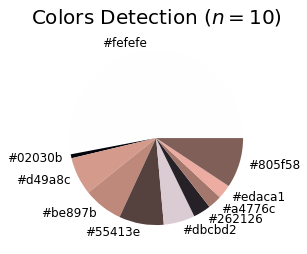

In [10]:
plt.title('Colors Detection ($n=10$)', fontsize=20)
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)